In [36]:
# 必要ライブラリのインストール
from PIL import Image
import numpy as np

In [75]:
def MSE(x, y):
    l = len(x)
    sum = 0.0
    for i in range(l):
        diff = float(x[i]) - float(y[i])
        sum += (diff * diff)
    return sum / l

In [187]:
img1 = Image.open('ref/c1b_ref.tga')
img2 = Image.open('water_caustics/water_caustics064.tga')
img1_gray = img1.convert('L')
img2_gray = img2.convert('L')
img1_gray_arr = np.array(img1_gray)
img2_gray_arr = np.array(img2_gray)

In [39]:
#coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

"""
参考:
[1]『画像処理とパターン認識入門』酒井幸市 著
[2] scipy.fftpack.dct http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.fftpack.dct.html
"""

N = 8

class DCT:
	def __init__(self,N):
		self.N = N	# データ数．
		# 1次元，2次元離散コサイン変換の基底ベクトルをあらかじめ作っておく
		self.phi_1d = np.array([ self.phi(i) for i in range(self.N) ])
		
		# Nが大きいとメモリリークを起こすので注意
		# MNISTの28x28程度なら問題ない
		self.phi_2d = np.zeros((N,N,N,N))
		for i in range(N):
			for j in range(N):
				phi_i,phi_j = np.meshgrid(self.phi_1d[i],self.phi_1d[j])
				self.phi_2d[i,j] = phi_i*phi_j

	def dct(self,data):
		""" 1次元離散コサイン変換を行う """
		return self.phi_1d.dot(data)
	
	def idct(self,c):
		""" 1次元離散コサイン逆変換を行う """
		return np.sum( self.phi_1d.T * c ,axis=1)
	
	def dct2(self,data):
		""" 2次元離散コサイン変換を行う """
		return np.sum(self.phi_2d.reshape(N*N,N*N)*data.reshape(N*N),axis=1).reshape(N,N)
	
	def idct2(self,c):
		""" 2次元離散コサイン逆変換を行う """
		return np.sum((c.reshape(N,N,1)*self.phi_2d.reshape(N,N,N*N)).reshape(N*N,N*N),axis=0).reshape(N,N)
	
	def phi(self,k):
		""" 離散コサイン変換(DCT)の基底関数 """
		# DCT-II
		if k == 0:
			return np.ones(self.N)/np.sqrt(self.N)
		else:
			return np.sqrt(2.0/self.N)*np.cos((k*np.pi/(2*self.N))*(np.arange(self.N)*2+1))
		# DCT-IV(試しに実装してみた)
		#return np.sqrt(2.0/N)*np.cos((np.pi*(k+0.5)/self.N)*(np.arange(self.N)+0.5))

In [40]:
def DCT_block(img_block):
    #N = 8			# データの次元は10x10とする
    dct = DCT(N)	# 離散コサイン変換を行うクラスを作成
    c = dct.dct2(img_block)	# 2次元離散コサイン変換
    return c

In [188]:
img_gray_arr = img2_gray_arr
height = img_gray_arr.shape[0]
width = img_gray_arr.shape[1]

sum = np.array(np.zeros((N, N)))
for i in range(0, height, N):
    for j in range(0, width, N):
        sum += abs(DCT_block(img_gray_arr[i : i + N, j : j + N]))
ave = sum / (height / N * width / N)

f = open('tmp.txt', 'w')
for i in range(N):
    for j in range(N):
        f.write(str(ave[i, j]) + ' ')
    f.write('\n')
f.close()

In [32]:
i0 = 480
j0 = 40
arr = DCT_block(img2_gray_arr[i0 : i0 + N, j0 : j0 + N])

f = open('tmp2.txt', 'w')
for i in range(N):
    for j in range(N):
        f.write(str(arr[i, j]) + ' ')
    f.write('\n')
f.close()

In [134]:
from PIL import ImageFilter

In [193]:
tmp_arr = np.array(img1_gray.filter(ImageFilter.FIND_EDGES))
tmp_arr[57:65,545:553]

array([[0, 0, 2, 0, 0, 0, 3, 0],
       [3, 4, 0, 1, 5, 0, 3, 0],
       [0, 1, 3, 7, 0, 0, 3, 0],
       [1, 2, 4, 0, 4, 0, 3, 0],
       [3, 0, 0, 1, 0, 0, 0, 6],
       [0, 0, 2, 0, 7, 0, 3, 0],
       [0, 1, 3, 0, 0, 1, 5, 0],
       [0, 3, 4, 0, 2, 0, 0, 0]], dtype=uint8)

In [146]:
ref_edge_list = np.array(img1_gray.filter(ImageFilter.FIND_EDGES)).reshape(-1)

In [155]:
for i in range(1, 11, 2):
    img2_gray_blur = img2_gray.filter(ImageFilter.MedianFilter(size=i))
    img2_gray_blur_edge = img2_gray_blur.filter(ImageFilter.FIND_EDGES)
    edge_list = np.array(img2_gray_blur_edge).reshape(-1)
    print(MSE(ref_edge_list, edge_list))

142.2495876736111
117.46110243055556
136.54475983796297
149.22729021990742
158.1241579861111


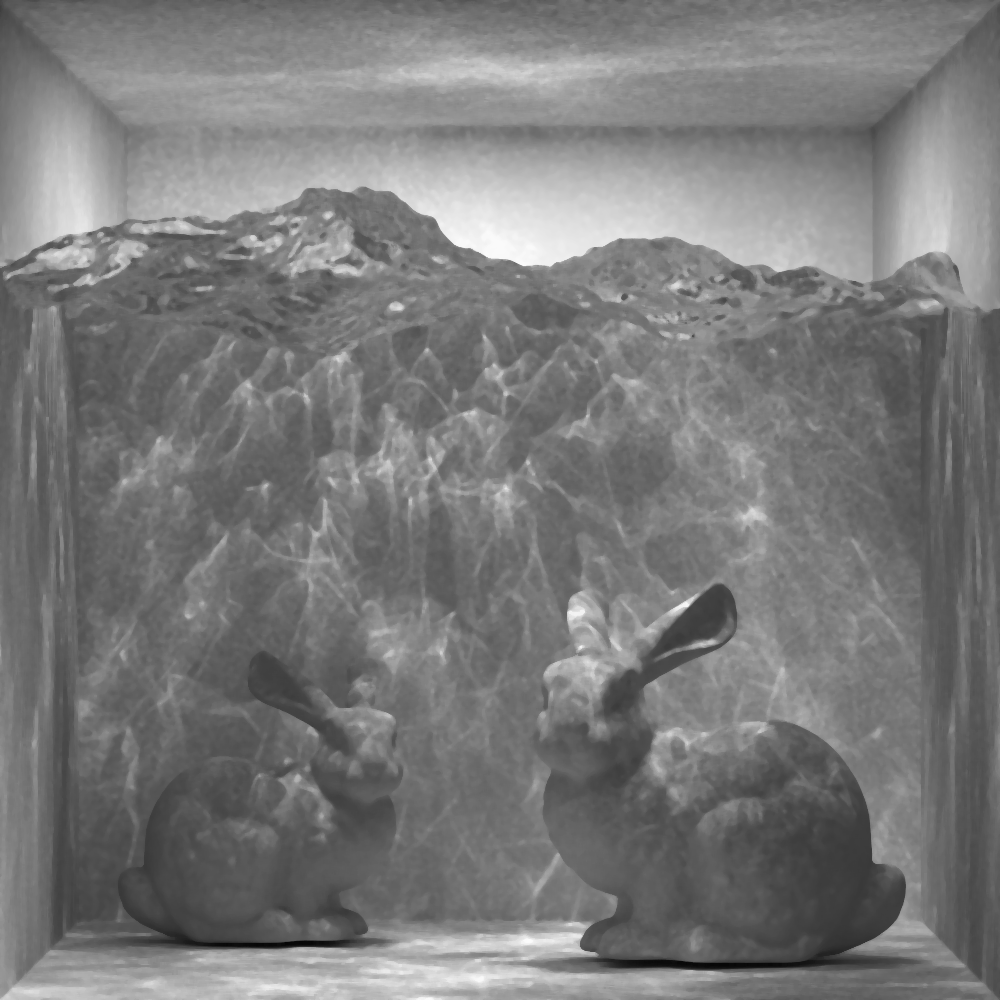

In [189]:
from PIL import ImageFilter
img2_gray.filter(ImageFilter.MedianFilter(size=5))

In [160]:
np.array(img1_gray)[0:5, 0:5]

array([[180, 180, 180, 180, 180],
       [180, 180, 180, 180, 180],
       [181, 181, 181, 181, 181],
       [182, 182, 182, 182, 182],
       [182, 182, 182, 182, 182]], dtype=uint8)

In [180]:
tmp_arr = img1_gray.filter(ImageFilter.FIND_EDGES)

In [181]:
edge_arr = np.array(tmp_arr).reshape(-1)
cnt = [0] * 256
for v in edge_arr:
    cnt[v] += 1
for i in range(256):
    print(cnt[i])

532658
18770
18284
17931
17251
16759
16137
15545
14668
14375
13448
12737
12232
11627
11067
10537
10047
9661
9059
8527
8018
7624
7249
6962
6807
6414
6099
5758
5454
5261
4918
4849
4488
4311
4105
3941
3812
3541
3448
3300
3168
3072
2886
2712
2618
2503
2392
2378
2209
2092
2019
1984
1869
1792
1775
1619
1600
1654
1499
1423
1359
1362
1327
1278
1174
1192
1193
1135
1023
1044
1031
945
958
885
830
884
800
850
781
795
777
711
740
693
724
660
676
651
656
655
635
618
636
658
614
646
563
561
604
567
532
535
488
489
447
422
423
427
419
416
407
409
382
353
362
367
349
315
306
295
289
307
294
298
254
275
260
296
267
267
308
324
259
264
267
243
255
228
224
201
215
203
183
200
188
193
189
189
183
181
185
155
169
158
173
146
153
137
160
112
120
131
137
103
110
123
123
125
127
116
128
106
116
112
110
107
119
107
119
105
111
96
126
107
100
96
87
74
83
89
79
87
73
78
74
75
83
90
61
74
64
71
66
64
58
47
64
55
59
57
54
56
57
56
54
50
54
52
39
44
62
44
53
41
43
46
37
38
46
38
41
54
41
36
35
38
32
39
35
36
34
31
3

In [174]:
edge_arr

array([180, 180, 180, ..., 115, 116, 116], dtype=uint8)

In [165]:
img1_gray_arr.save('tmp.tga')

AttributeError: 'numpy.ndarray' object has no attribute 'save'